<a href="https://colab.research.google.com/github/pedroblossbraga/Machine-Learning-with-Python/blob/main/Gradient_Descent_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Optimization methods - Gradient Method (Gradient Descent)

Pedro Blöß Braga, 2021 - February

<br>

<br>

## Contents
- Gradient Descent (1)
- Stochastic Gradient Descent (2)
- Underdetermined linear systems (3)
- Least Squares and the Normal System (4)


<br>

<br>

<br>

<br>

----------------------------------------------------------


<br>


### Gradient Descent - Algorithm (1.1)
- Given $x^0 \in \mathbb{R}^n$
- $k=0$
- WHILE $\nabla f(x^k)\neq0$
  - define $d^k = - \nabla f(x^k)$ (a descent direction)
  - obtain $t_k >0$ such that $f(x^k+t_kd^k)< f(x^k)$
  - $x^{k+1}=x^k+t_kd^k$
  - $k=k+1$


![](https://miro.medium.com/max/1406/1*t4aYsxpCqz2eymJ4zkUS9Q.png)


Basicly, in this method, you start at a given point $x^0$, and you update your location in a direction $d^k$ and step size $t_k$, changing the direction by the conjugate gradient, i.e. $\langle d^{k+1}, d \rangle=0$ (1)

(1) Proof 

Let us assume a auxiliary function $\psi:\mathbb{R} \rightarrow \mathbb{R}$, given by

\begin{equation}
\psi(t) = f(x^k + t_kd^k)
\end{equation}

\begin{equation}
\psi'(t) = \nabla f(x^k+t_kd^k)^Td^k =  \nabla f(x^{k+1})^Td^k
\end{equation}

Then,

\begin{equation}
\langle d^{k+1}, d \rangle = - \nabla f(x^{k+1})^T d^k = - \psi'(t) =0 \quad \square
\end{equation}

<br>

This algorithm is an optimization method (can be nonlinear, for nonconstrained optimization), i.e., to minimize a certain cost function $J(\theta)$ (training a model in order to maximize accuracy).

For instance, with the cost function:

\begin{equation}
J(\theta) = \frac{1}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2 
\end{equation}

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)}) x^{(i)}_j
\end{equation}

And our gradient vector would look like

\begin{equation}
\nabla_{\theta} J(\theta) = \pmatrix{ \frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
... \\
\frac{\partial J(\theta)}{\partial \theta_n}
}  = \frac{2}{m} X^T (X .\theta - y)
\end{equation}

We would have the updating function:

\begin{equation}
\theta_{j} \leftarrow \theta_j - \eta \frac{\partial}{\partial \theta_j} J(\theta)
\end{equation}
or more generally:
\begin{equation}
\theta \leftarrow \theta- \eta \nabla_{\theta} J(\theta)
\end{equation}

<br>

OBS: Note that the Gradient descent method uses $X$, so it uses the full training set, resulting in bad computational cost for large datasets. But, if you had thounsands of features, Gradient Descent would probally train faster then a Least Squares method.

<br>



## Implementation


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(X_b, y, theta, eta=0.05, epochs=100, m=100):

  for _ in range(epochs):
    gradients = (2/m)* X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

  return theta

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
theta = np.random.randn(2,1)


X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # \theta = (X^TX)^(-1)(X^Ty) # normal equation

gradient_descent(X_b, y, theta)

array([[3.94023509],
       [3.15237157]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) # <X, \theta>
y_predict

array([[ 3.88972648],
       [10.28384337]])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

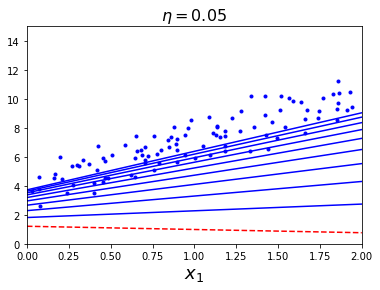

In [ ]:
def plot_gradient_descent(X_b, X, y, theta, eta, theta_path=None, epochs=1000):
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(epochs):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # \frac{\partial J(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)}) x^{(i)}_j

        theta = theta - eta * gradients # \theta_{next} = \theta- \eta \nabla_{\theta} J(\theta)
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    return plt

plot_gradient_descent(X_b, X, y, theta, eta=0.05)

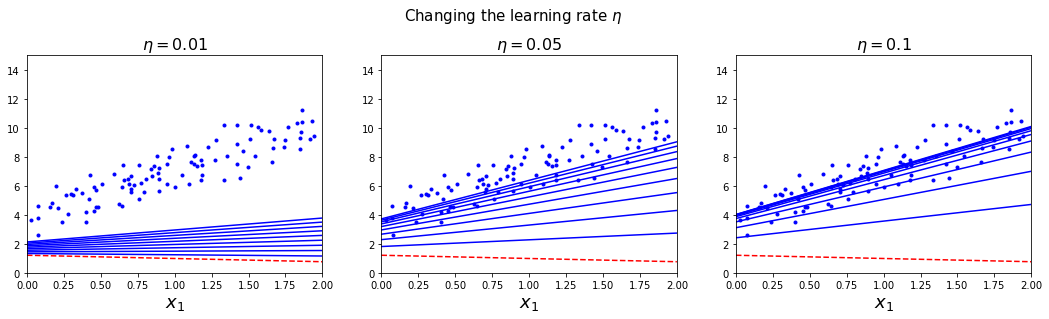

In [ ]:
plt.figure(figsize=(18,4))
plt.suptitle('Changing the learning rate $\eta$', y=1.05, fontsize=15)
plt.subplot(1,3,1)
p1 = plot_gradient_descent(X_b, X, y, theta, eta=0.01)
plt.subplot(1,3,2)
p2 = plot_gradient_descent(X_b, X, y, theta, eta=0.05)
plt.subplot(1,3,3)
p3 = plot_gradient_descent(X_b, X, y, theta, eta=0.1)
plt.show()

## Stochastic Gradient Descent (SGD) (2)

The main issue with Gradient Descent is that it uses the intire training set to compute the gradients in each step, increasing computational complexity. In the other hand, Stochastic Gradient Descent utilizes a batch of $B$ data points to compute the mean gradient. The algorithm becomes much faster and enables working with large datasets.
As a counter point, since it inserts randomness to the process, the direction may not be always in decay in the cost surfice (we loose the property ($f(x_{k+1}) \leq f(x_k)$).

#### Algorithm
- Initialize weights randomly: $W \sim \mathcal{N}(0, \sigma^2)$
- Loop until convergence:
  - Select $B$ points
  - compute the gradient
      \begin{equation}
      \frac{\partial J(W)}{\partial W} = \frac{1}{B} \sum_{k=1}^B \frac{\partial J_k(W)}{\partial W} 
      \end{equation}
      - update weigths
      \begin{equation}
      W \leftarrow W - \eta \nabla_W J(W)
      \end{equation}
- return $W$

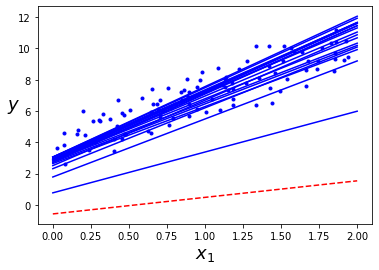

In [ ]:
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"       
            plt.plot(X_new, y_predict, style)  
        random_index = np.random.randint(m)

        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # \frac{\partial J(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)}) x^{(i)}_j

        eta = learning_schedule(epoch * m + i) #eta = 5/(epoch * m + i + 50)

        theta = theta - eta * gradients # \theta_{next} = \theta- \eta \nabla_{\theta} J(\theta)

plt.plot(X, y, "b.")   
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Underdetermined Linear Systems (3)

- A matrix $A$, $m$x$n$ and $m>n$, can be associated with a linear transformation of the spaces $\mathbb{R}^n$ and $\mathbb{R}^m$
- Its Image is a vector subspace of $\mathbb{R}^m$, since $m>n$
- since $b \in \mathbb{R}^m$, $b$ is not generally containg in $A$'s image
- therefore there will not usually exist $x \in \mathbb{R}^n$ such that $Ax=b$, and this equation will have solution only if $b \in Im(A)$

![](https://github.com/pedroblossbraga/Machine-Learning-with-Python/blob/main/images/UNDERDETERMINEDLINEARSYSTEMS.jpeg?raw=true)

- So we can determine the vector $\bar{x}$ in $Im(A)$ that is closest to $b$.

Using the euclidian distance:
\begin{equation}
  || b - A \bar{x} || \leq || b - AX ||, \forall x \in \mathbb{R}^n 
\end{equation}

\begin{equation}
  ||b - Ax || = \sqrt{ \sum_{i=1}^m [b_i - (Ax)_i]^2}
\end{equation}

- Geometrically, $\bar{x} = proj_{Im(A)}(b)$
- This problem always haves a solution, and if the columns of $A$ are linearely independent of $\mathbb{R}^m$, then the solution is unique


<br>

## Least Squares (4)
- It consists of minimizing the cost function of the squared errors

Given the input matrix $X$ and the target vector $y$, the value $\hat{\theta}$ minimizes the cost function:

\begin{equation}
\hat{\theta} = (X^T. X)^{-1}X^T.y
\end{equation}


- Normal equation deduction

Given a undetermined linear system $Ax=b$, $A$ is $m$x$n$, $m>n$, $b\in \mathbb{R}^n$, and $x \in \mathbb{R}$, we have the ortogonality relation:
\begin{equation}
\langle a^{(j)}, b-Ax \rangle =0, \quad 1 \leq j \leq n
\end{equation}
where

\begin{equation}
a_{(j)} = \pmatrix{ a_{1j} \\ a_{2j} \\ ... \\ a_{mj} }
\end{equation}

is the $j$-th column vector of the matrix $A = a_i^{(j)} = a_{ij}$

\begin{equation}
\langle a^{(j)}, b-Ax \rangle = \sum_{i=1}^n a_i^{(j)} [b_i - (Ax)_i] = \sum_{i=1}^n a_{ij}[b_i - (Ax)_i] 
\end{equation}

\begin{equation}
= \sum_{i=1}^n a_{ij}(b_i - \sum_{k=1}^n a_{ik}x_k) 
\end{equation}

\begin{equation}
= \sum_{i=1}^n a_{ij}b_i - \sum_{k=1}^n(\sum_{i=1}^m a_{ij} a_{ik})x_k 
\end{equation}

\begin{equation}
= (A^Tb)_j - \sum_{k=1}^n (A^T A)_{jk}x_k = (A^T b)_j - [(A^T A)x]_j 
\end{equation}

\begin{equation}
\Rightarrow (A^T b)_j - [(A^T A)x]_j =0 
\end{equation}

\begin{equation}
\therefore A^T Ax = A^T b \quad \square
\end{equation}

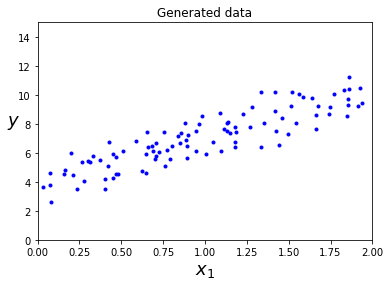

In [ ]:
plt.title('Generated data')
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

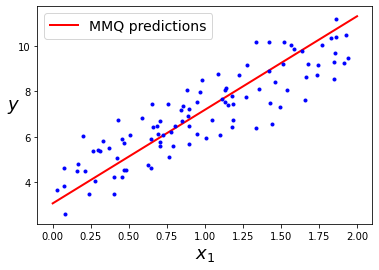

In [ ]:
## using the generated linear function from the normal equation

plt.plot(X_new, y_predict, "r-", linewidth=2, label="MMQ predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

### References

- Richard L. Burden e J.Douglas Faires. "Numerical Analysis".
- Strang, Gilbert. "Linear Algebra and its applications".
- Otimização Contínua - KARAS, Elizabeth.
- https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

<br>

#### License
- MIT

<br>

#### Contact
- https://www.linkedin.com/in/pedro-bl%C3%B6%C3%9F-braga-3263a1136/
- https://github.com/pedroblossbraga